# Лабораторная работа № 5

In [1]:
import math
import numpy as np
import pandas
from scipy import stats
import matplotlib.pyplot as plt
#подключение библиотек

## Анализ предметной области:

Датасет orders.csv содержит информацию о заказах пользователей.
Столбцы хранят такую информацию, как:

1. transactionId — идентификатор заказа;
2. visitorId — идентификатор пользователя, совершившего заказ;
3. date — дата, когда был совершён заказ;
4. revenue — выручка заказа;
5. group — группа A/B-теста, в которую попал заказ.

Вывод первых 20 строк набора данных осуществляется с помощью функции head() библиотеки pandas.

In [2]:
df1 = pandas.read_csv('C:\\Users\\Alina\\OneDrive\\Рабочий стол\\андан\\orders.csv')
#полученые данных из файла с датасетом в переменнную df
display(df1.head(20))
#вывод первых 20 значений датасета

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


Датасет visitors.csv содержит информацию для A/B-теста.
Столбцы хранят такую информацию, как:

1. date — дата;
2. group — группа A/B-теста;
3. visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Вывод первых 20 строк набора данных осуществляется с помощью функции head() библиотеки pandas.

In [3]:
df2 = pandas.read_csv('C:\\Users\\Alina\\OneDrive\\Рабочий стол\\андан\\visitors.csv')
#полученые данных из файла с датасетом в переменнную df
display(df2.head(20))
#вывод первых 20 значений датасета

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


## Предобработка данных:

Предобработка данных датасета orders.csv:

In [4]:
df1.info()
#оценка данных и пропущенных значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


По результатам использования метода info() для оценки данных можно сделать вывод, что столбец date имеет неправильный тип данных, который необходимо изменить для упрощения дальнейшей работы с данными. Для замены типа данных нужно воспользоваться методом astype().

In [5]:
df1['date'] = df1['date'].astype(np.datetime64)
#изменение типов данных

In [6]:
df1.columns
#названия столбцов для проверки на корректность

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

Необходимо, чтобы названия были указаны в змеином регистре, поэтому для изменений названий нужно воспользоваться методом rename().

In [7]:
df1 = df1.rename(columns={'transactionId':'transaction_id', 'visitorId': 'visitor_id'})
#изменение названия столбцов

Далее требуется проверить изменения в названии столбцов методом columns.

In [8]:
df1.columns
#названия столбцов для проверки на корректность

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

Проверка пропущенных значений осуществляется с помощью метода isna(), а isna().sum() находит сумму пропущенных значений по столбцам.

In [9]:
print(df1.isna().sum())
#сумма пропущенных значений по столбцам

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64


Пропущенных значений в датасете найдено не было.Также необходимо проверить данные на наличие дубликатов, используя метод duplicated().sum() 

In [10]:
print(df1.duplicated().sum())
#проверка наличия дубликатов

0


Дубликаты отсутствуют. Осуществить поиск неявных дубликатов можно с помощью метода unique().

In [11]:
for i in range(1, 5):
    a = df1.columns[i]
    if df1.dtypes[i] == 'object':
        print(df1[a].unique())
#поиск неявных дубликатов по строковым значениям

['B' 'A']


Неявные дубликаты не найдены. Предобработка данных датасета visitors.csv происходит аналогичным образом.

In [12]:
df2.info()
#оценка данных и пропущенных значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


По результатам использования метода info() для оценки данных можно сделать вывод, что столбец date имеет неправильный тип данных, который необходимо изменить для упрощения дальнейшей работы с данными. Для замены типа данных нужно воспользоваться методом astype().

In [13]:
df2['date'] = df2['date'].astype(np.datetime64)
#изменеие типов данных
df2.columns
#названия столбцов для проверки на корректность
print(df2.isna().sum())
#сумма пропущенных значений по столбцам
print("Дубикаты:", df2.duplicated().sum())
#проверка наличия дубликатов
for i in range(1, 3):
    a = df2.columns[i]
    if df2.dtypes[i] == 'object':
        print(df2[a].unique())
#поиск неявных дубликатов по строковым значениям

date        0
group       0
visitors    0
dtype: int64
Дубикаты: 0
['A' 'B']


Названия данных столбцов точно отображают содержимое данных столбцов. Пропущенных значений в датасете найдено не было. Дубликаты не найдены.

## Выполнение работы

Необходимо проверить наличие пересекающихся пользователей и удалить их.

In [14]:
A1 = df1[df1['group'] == 'A'] # разделение датасета на orders 2 группы
B1 = df1[df1['group'] == 'B']

count = 0
for K, i in A1.iterrows(): # Итерация строк DataFrame в виде пар (индекс, ряд).
    for q, j in B1.iterrows():
        if i["visitor_id"] == j["visitor_id"]:
            df1 = df1.drop(df1[df1.visitor_id == i['visitor_id']].index)
            count += 1
print("Кол-во удаленных значений:", count)

Кол-о удаленных значений 183


Необходимо создать массив уникальных пар значений дат и групп теста.

In [17]:
datesGroups = df1[['date','group']].drop_duplicates() # удаление повторов

Необходимо получить агрегированные кумулятивные данные по дням о заказах.

In [31]:
DATA_ord = datesGroups.apply(lambda x: df1[np.logical_and(df1['date'] <= x['date'],
df1['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique',
'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
DATA_ord.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Необходимо получить агрегированные кумулятивные данные по дням о посетителях.

In [39]:
DATA_visitors = datesGroups.apply(lambda x: df2[np.logical_and(df2['date'] <= x['date'], 
df2['group'] == x['group'])].agg({'date' : 'max', 
'group' : 'max', 'visitors' : 'sum'}), 
axis=1).sort_values(by=['date','group'])
DATA_visitors.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Необходимо объединить полученные данные в одной таблице.

In [40]:
cumulativeData = DATA_ord
cumulativeData.rename(columns={'transaction_id': 'orders', 'visitor_id': 'byers'}, inplace=True) # переименование столбцов
cumulativeData = DATA_ord.join(DATA_visitors.drop(['date', 'group'], axis=1), sort=False) # объединеие данных

cumulativeData.head() # вывод значений

,date,group,orders,byers,revenue,visitors
55,2019-08-01,A,23,19,142779,719
66,2019-08-01,B,17,17,59758,713
175,2019-08-02,A,42,36,234381,1338
173,2019-08-02,B,40,39,221801,1294
291,2019-08-03,A,66,60,346854,1845


Необходимо разделить cumulativeData на cumulativeRevenueA и cumulativeRevenueB – для группы А и B аналогичным способом.

In [41]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B']

С помощью полученных данных нужно изобразить график среднего чека по группам А и В. По оси х – date, по оси y – revenue/ order.

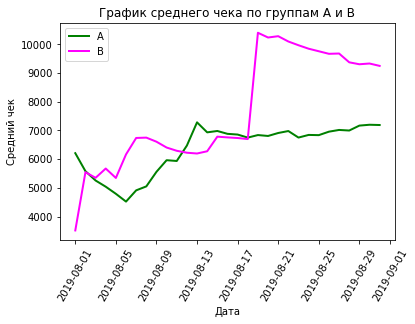

In [49]:
fig, ax = plt.subplots()

ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], color='green', linewidth=2.0, label = 'A') 
# график зависимости по группе А, нахождение среднего значения
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], color='magenta', linewidth=2.0, label = 'B')
# график зависимости по группе В, нахождение среднего значения

ax.set_title("График среднего чека по группам А и В")
# подписи осей и графика
ax.set_xlabel('Дата')
ax.set_ylabel('Средний чек')

ax.tick_params(axis='x', rotation=60) # поворот подписи данных по оси x
ax.legend() # вывод легенды

plt.show() # вывод окна графика

## Вывод:

По полученным данным можно сделать вывод, что:<br>
<li>У группы А с течением времени наблюдается небольшой спад, а в последствии плавный рост среднего чека, что означает, что выросла выручка за заказ. После 2019-08-13 значение среднего чека остается стабильным.<br>
<li>У группы B в течении большей части периода наблюдается рост средего чека с резким скачком вверх в 2019-08-17 и последующим плавным спадом.